# <center> PHẦN 2. KHÁM PHÁ DỮ LIỆU & ĐẶT CÂU HỎI

# Tổng quan về tiền xử lý dữ liệu
Mục tiêu chính:
## A. Làm sạch dữ liệu (Exploratory Data Analysis - EDA):
1. Khám phá dữ liệu: Đưa ra những đánh giá đầu tiên về dữ liệu để hiểu cấu trúc và ý nghĩa của chúng.
Trước khi xử lý, chúng ta cần hiểu rõ cấu trúc và nội dung của dữ liệu. Các hoạt động bao gồm:

+ Kiểm tra số lượng dòng, cột.
Xác định kiểu dữ liệu của từng cột (số, phân loại, ngày tháng, ...).
+ Kiểm tra tỷ lệ dữ liệu bị thiếu, các giá trị bất thường.
+ Tóm tắt các thống kê cơ bản như trung bình, giá trị nhỏ nhất/lớn nhất, phương sai, ...

(Bước này làm giống format HW2)

2. Xử lý dữ liệu thiếu  (Handling Missing Data):
Dữ liệu thiếu thường gây sai lệch trong phân tích. Chúng ta sẽ điền giá trị bị thiếu bằng các phương pháp như:
+ Giá trị trung bình/median.
+ Thuật toán Machine Learning. Ae chú ý là cần áp dụng đúng model, ví dụ như đối với kiểu dữ liệu là Category (phân lớp) thì nên sử dụng KNN, hoặc int64 (Liên tục) thì xài Linear Regression,....
+ Hoặc loại bỏ các dòng/cột chứa quá nhiều giá trị bị thiếu nếu cần thiết.

3. Xử lý dữ liệu nhiễu: Loại bỏ các giá trị bất thường (outliers) để đảm bảo dữ liệu sạch (Sử dụng  phương pháp như IQR (Interquartile Range) để phát hiện và loại bỏ những giá trị nằm ngoài phạm vi hợp lý.)

4. Chuẩn hóa kiểu dữ liệu:
- Chuyển đổi dữ liệu về đúng kiểu cần thiết (ví dụ: chuyển đổi ngày tháng, số nguyên, số thực).
- Mã hóa dữ liệu phân loại (categorical data) thành dạng số, phù hợp với mô hình (Label Encoding hoặc One-hot Encoding). (nếu cảm thấy cần thiết)
P/s: Thứ tự các bước trên có thể thay đổi, tùy theo ae thiết kế


## B. Giảm chiều dữ liệu(Dimensionality Reduction): Giảm độ phức tạp
1..Khám phá dữ liệu (Tiếp theo):
- Trực quan hóa mối quan hệ giữa các biến để xác định những biến dư thừa, không cần thiết.
- Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

## C. Chuẩn hóa dữ liệu (Nếu còn thời gian)
- Min-Max Scaling: Đưa dữ liệu về khoảng [0, 1].
- Z-score Standardization: Chuẩn hóa dữ liệu thành phân phối chuẩn với trung bình bằng 0 và phương sai bằng 1.
- Robust Scaling: Loại bỏ tác động của các giá trị ngoại lai khi chuẩn hóa.
- Decimal Scaling: Chia giá trị cho lũy thừa của 10 để thu hẹp giá trị dữ liệu.

## D. Rời rạc hóa dữ liệu (Tìm hiểu thêm)

## E. Lưu dữ liệu sạch: Dữ liệu sau khi tiền xử lý sẽ được lưu lại để sử dụng trong các giai đoạn phân tích tiếp theo.

# Import các thư viện cần thiết


In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# A. LÀM SẠCH DỮ LIỆU

## A.1. Khám phá dữ liệu

### Đọc dữ liệu từ raw_data

Đầu tiên, ta đọc 'team_rankings.csv' để lưu trữ vào biến raw_data

In [2]:
raw_data = pd.read_csv('team_rankings.csv')
raw_data.head()

,Season,Team,Ranking,Matches Played,Wins,Draws,Losses,Goals Scored,Goals Conceded
0,2013,Man City,1,38,27,NaN,6,102,37
1,2013,Liverpool,2,38,26,6.0,6,101,50
2,2013,Chelsea,3,38,25,NaN,6,71,27
3,2013,Arsenal,4,38,24,7.0,7,68,41
4,2013,Everton,5,38,21,NaN,8,61,39


### Dữ liệu có bao nhiêu hàng, bao nhiêu cột?


Tiếp theo, chúng ta tính toán số lượng dòng và cột và lưu vào biến 'num_cols' và 'num_rows'

In [3]:
num_rows, num_cols = raw_data.shape
print(f'Số dòng: {num_rows}')
print(f'Số cột: {num_cols}')

Số dòng: 220
Số cột: 9


### Ý nghĩa của các dòng dữ liệu


Bảng dữ liệu cung cấp thông tin tổng quan về thành tích của các đội bóng hàng đầu trong mùa giải 2013 - 2023 của giải Ngoại hạng Anh. Dữ liệu dòng bao gồm các thông tin về năm, tên đội, xếp hạng, số trận đã đấu, số trận thắng, hòa, thua, tổng số bàn thắng ghi được và số bàn thua phải nhận của từng năm từ 2013 - 2023 của từng đội tham gia

### Dữ liệu các dòng có bị lặp không?

Tiếp theo, tính toán số lượng dòng có lặp không và lưu vào biến 'duplicated_rows'

In [4]:
duplicated_rows = raw_data[raw_data.duplicated()]
if duplicated_rows.empty:
    print("Không có dòng bị lặp trong dữ liệu.")
else:
    print("Có dòng bị lặp trong dữ liệu.")

Không có dòng bị lặp trong dữ liệu.


Như vậy, giữa mỗi dòng không có dự liệu nào bị lặp

### Ý nghĩa của các cột dữ liệu



*   Cột đầu tiên: Season (mùa giải) - năm mùa giải mà dữ liệu ghi nhận (2013-2023)
*   Cột thứ 2: Team (đội bóng) - tên đội bóng tham gia mùa giải
* Cột thứ 3: Ranking (xếp hạng) - vị trí của đội bóng trên bảng xếp hạng cuối mùa giải (1 là cao nhất, các vị trí tiếp theo giảm dần).
* Cột thứ 4: Matched Played (số trận đã tham gia) - tổng số trận đấu mà đội bóng tham gia trong mùa giải.
* Cột thứ 5, 6, 7: Wins - Draws - Losses (thắng-hòa-thua) - số trận thắng - hòa - thua của đội bóng đó trong mùa giải.
* Cột thứ 8,9: Goals Scored - Goals Conceded (bàn thắng-bàn thua) - tổng số bàn thắng và bàn thua mà đội bóng được ghi nhận trong bàn thắng


### Kiểu dữ liệu của từng cột

In [5]:
raw_data.dtypes

,0
Season,int64
Team,object
Ranking,int64
Matches Played,int64
Wins,int64
Draws,float64
Losses,int64
Goals Scored,int64
Goals Conceded,int64


### Chuẩn hóa kiểu dữ liệu nếu chưa phù hợp

Nhận thấy rằng, 'Season' có kiểu dữ liệu số, tuy nhiên nó thể hiện thời gian thay vì một số. Do đó, ta sẽ chuyển đổi nó thành kiểu Object để thể hiện rõ ràng hơn

In [6]:
raw_data['Season'] = raw_data['Season'].astype('object')
raw_data.dtypes

,0
Season,object
Team,object
Ranking,int64
Matches Played,int64
Wins,int64
Draws,float64
Losses,int64
Goals Scored,int64
Goals Conceded,int64


## Với các cột dữ liệu không phải dạng số, các giá trị được phân bổ như thế nào

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [7]:
def categorical_analysis(df: pd.DataFrame) -> pd.DataFrame:
    cat_cols = df.select_dtypes(exclude=['number']).columns
    analysis_results = []

    for col in cat_cols:
        missing_ratio = round(df[col].isna().sum() / df.shape[0] * 100, 1)
        num_values = df[col].nunique()
        value_counts = df[col].value_counts(normalize=True)
        value_ratios = {val: round(perc * 100, 1) for val, perc in value_counts.items()}

        analysis_results.append({
            'column': col,
            'missing_ratio': missing_ratio,
            'num_values': num_values,
            'value_ratios': value_ratios,
        })

    return pd.DataFrame(analysis_results)

cat_col_info = categorical_analysis(raw_data)
cat_col_info

,column,missing_ratio,num_values,value_ratios
0,Season,0.0,11,"{2013: 9.1, 2014: 9.1, 2015: 9.1, 2016: 9.1, 2..."
1,Team,0.0,34,"{'Man City': 5.0, 'Chelsea': 5.0, 'Arsenal': 5..."


### Với các cột có kiểu dữ liệu số, các giá trị được phân bổ như thế nào

Đối với các cột dữ liệu số, ta tính toán
* Tỉ lệ các giá trị bị thiếu
* Giá trị nhỏ nhất
* Giá trị lớn nhất
* Trung bình
* Các Q1(25%), Q3(75%)

Sau đó lưu vào DataFrame num_col_info, trong đó:
* Tên các cột là cột có kiểu dữ liệu số
* Tên các dòng là missing_ratio, min, lower_quartile, median, upper_quartile, max

In [8]:
def missing_ratio(s: pd.Series) -> float:
    return round(s.isna().sum() / s.shape[0] * 100, 1)

def lower_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.25), 1)

def median(s: pd.Series) -> float:
    return round(s.median(), 1)

def upper_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.75), 1)

num_col_info = raw_data.select_dtypes(include='number').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).round(1)
num_col_info

,Ranking,Matches Played,Wins,Draws,Losses,Goals Scored,Goals Conceded
missing_ratio,0.0,0.0,0.0,1.8,0.0,0.0,0.0
min,1.0,38.0,3.0,2.0,1.0,20.0,22.0
lower_quartile,5.8,38.0,10.0,7.0,11.0,40.0,44.0
median,10.5,38.0,13.0,9.0,15.0,49.0,53.0
upper_quartile,15.2,38.0,19.0,11.0,19.0,63.2,62.0
max,20.0,38.0,32.0,17.0,29.0,106.0,104.0


## A.2.Xử lý dữ liệu thiếu


### Thống kế tỉ lệ dữ liệu bị thiếu

In [9]:
dict(num_col_info.iloc[0])

{'Ranking': 0.0,
 'Matches Played': 0.0,
 'Wins': 0.0,
 'Draws': 1.8,
 'Losses': 0.0,
 'Goals Scored': 0.0,
 'Goals Conceded': 0.0}

Sau khi thống kê dữ liệu, chúng ta thấy rằng nếu các dữ liệu có tỉ lệ thiếu quá nhiều sẽ dẫn đến thiếu nhiều và không sử dụng được nhiều, nên ta có thể xóa nó

Nếu dữ liệu bị thiếu lớn hơn 75%, ta sẽ xóa cột đó và cập nhật lại Dataframe

### Xóa cột có tỉ lệ thiếu trên 75%

In [10]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    copy = df.copy()
    cols = []
    for key, value in missing_lst.items():
        if value > threshold:
            cols.append(key)
    if len(cols) > 0:
        copy.drop(cols, axis=1, inplace=True)
        print(f"Xóa cột: {cols}")
    else:
        print("Không xóa cột nào")
    return copy
raw_data = drop_missing_features(raw_data, dict(num_col_info.iloc[0]))

Không xóa cột nào


Ta thấy rằng, tỉ lệ bị thiếu giữa các cột là 0%, trừ cột Draws là 1.8% (<75%), nên ta không cần xóa cột này và sẽ xử lý nó ở bước sau

### Điền dữ liệu thiếu vào

Như đã nói ở trên, ở đây ta sẽ xử lý dữ liệu ở cột Draws bị thiếu

Ta có số lượng tổng bàn đã tham gia = tổng bàn thua + thắng + hòa

Cũng thấy rằng, các dữ liệu bị thiếu là ở bàn hòa (draws).

Chính vì thể ta chỉ cần làm 1 phép tính đơn giản là
Draws = Matches Played - Wins - Losses là ta có thể điền được các dữ liệu thiếu đó

In [11]:
def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    copy = df.copy()
    copy['Draws'] = copy['Matches Played'] - copy['Wins'] - copy['Losses']
    return copy
raw_data = fill_missing_values(raw_data)

In [12]:
raw_data.head()

,Season,Team,Ranking,Matches Played,Wins,Draws,Losses,Goals Scored,Goals Conceded
0,2013,Man City,1,38,27,5,6,102,37
1,2013,Liverpool,2,38,26,6,6,101,50
2,2013,Chelsea,3,38,25,7,6,71,27
3,2013,Arsenal,4,38,24,7,7,68,41
4,2013,Everton,5,38,21,9,8,61,39


Cuối cùng, ta kiểm tra xem các dữ liệu bị thiếu ở tất cả cột có còn không

In [13]:
raw_data.select_dtypes(include='number').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).round(1)

,Ranking,Matches Played,Wins,Draws,Losses,Goals Scored,Goals Conceded
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,38.0,3.0,2.0,1.0,20.0,22.0
lower_quartile,5.8,38.0,10.0,7.0,11.0,40.0,44.0
median,10.5,38.0,13.0,9.0,15.0,49.0,53.0
upper_quartile,15.2,38.0,19.0,11.0,19.0,63.2,62.0
max,20.0,38.0,32.0,17.0,29.0,106.0,104.0


## A.3. Xử lý dữ liệu nhiễu

Sử dụng phương pháp IQR, đơn giản là phát hiện điểm dữ liệu nằm bên ngoài khoảng tứ phân vị thì loại **bỏ**

Tuy nhiên, ở file team_ranking này ta sẽ không thực hiện IQR cho nó vì những lý do sau:
* Một số cột như Ranking, Matches Played, Wins, và Losses đại diện cho số liệu cụ thể của mùa giải. Chúng thường có sự khác biệt lớn giữa các đội và không nên bị loại bỏ một cách máy móc dựa trên khoảng giá trị IQR.
* Dữ liệu thể thao thường có giá trị biên (outliers) đại diện cho những đội có thành tích xuất sắc hoặc kém hơn bình thường.
* Một số đội bóng hoặc trận đấu có hiệu suất vượt trội (ví dụ: Man City ghi 102 bàn trong một mùa giải) sẽ được xem như nhiễu khi sử dụng IQR, mặc dù thực tế chúng phản ánh đúng bản chất của đội bóng.

**Loại bỏ dữ liệu như vậy sẽ làm mất thông tin quan trọng về các đội hoặc trận đấu có hiệu suất đặc biệt. Các yếu tố ngữ cảnh này không thể hiện qua IQR và việc loại bỏ "nhiễu" sẽ làm giảm độ chính xác của phân tích.**

# B. Giảm chiều dữ liệu

### Vẽ correlation matrix

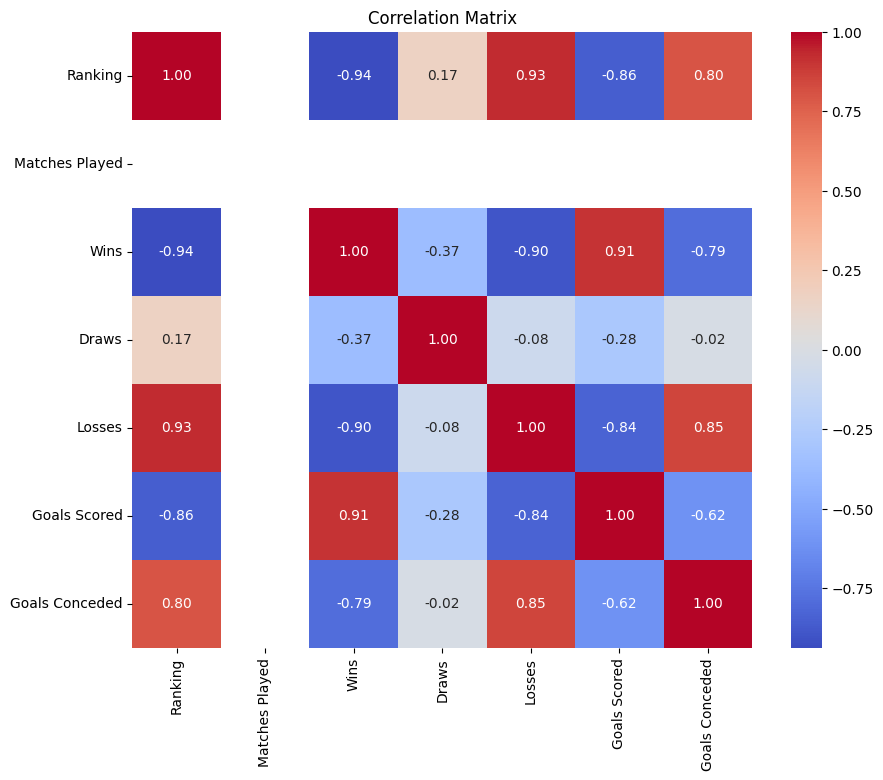

In [14]:
numerical_data = raw_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Sau khi xem xét dữ liệu ta nhận thấy, cột 'Matches Played' không ảnh hưởng đến các dữ liệu khác, nên ta có thể xóa nó ra khỏi Correlation Matrix và xóa khỏi file dữ liệu

In [15]:
raw_data = raw_data.drop(columns=['Matches Played'])
raw_data.head()

,Season,Team,Ranking,Wins,Draws,Losses,Goals Scored,Goals Conceded
0,2013,Man City,1,27,5,6,102,37
1,2013,Liverpool,2,26,6,6,101,50
2,2013,Chelsea,3,25,7,6,71,27
3,2013,Arsenal,4,24,7,7,68,41
4,2013,Everton,5,21,9,8,61,39


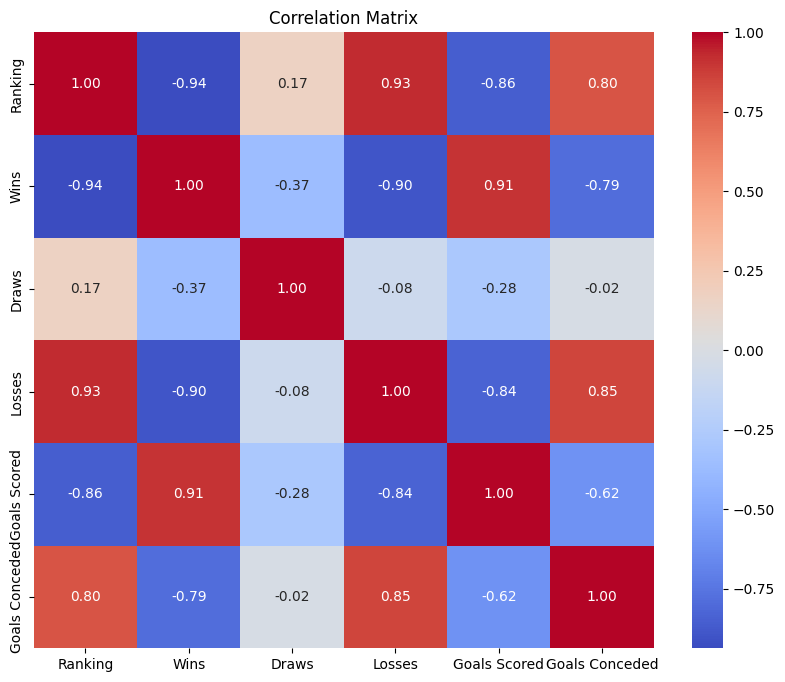

In [16]:
# Kiểm tra lại
numerical_data = raw_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

###Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

#### Xác định các cặp dữ liệu có độ tương quan cao hơn 0.8

In [17]:
threshold = 0.8

highly_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            highly_correlated.append((colname1, colname2))

print("Các cặp dữ liệu có độ tương quan cao:", highly_correlated)

Các cặp dữ liệu có độ tương quan cao: [('Ranking', 'Wins'), ('Ranking', 'Losses'), ('Ranking', 'Goals Scored'), ('Ranking', 'Goals Conceded'), ('Wins', 'Losses'), ('Wins', 'Goals Scored'), ('Losses', 'Goals Scored'), ('Losses', 'Goals Conceded')]


#### Giải thích

1. ('Ranking', 'Wins') - tương quan nghịch: đội bóng có nhiều chiến thắng hơn thường có thứ hạng (ranking) cao hơn. Thắng nhiều trận là yếu tố chính để đạt điểm số cao, từ đó cải thiện vị trí trên bảng xếp hạng. Tương quan nghịch do thắng nhiều trận thì thứ hạng cao (tức rank 1)
2. ('Ranking', 'Losses') tương quan thuận: đội bóng có nhiều trận thua hơn thường có thứ hạng thấp hơn. Số trận thua cao thể hiện phong độ kém, ảnh hưởng trực tiếp đến tổng điểm và thứ hạng.
3. ('Ranking', 'Goals Scored') - tương quan ngịch: các đội ghi nhiều bàn thắng thường có lối chơi tấn công hiệu quả và khả năng giành chiến thắng cao hơn. Điều này giúp họ đạt thứ hạng cao.
4. ('Ranking', 'Goals Conceded') - tương quan thuận: đội bóng bị thủng lưới nhiều thường có hàng thủ yếu và dễ mất điểm. Điều này dẫn đến thứ hạng thấp. Ngược lại, đội bóng với hàng phòng ngự tốt (ít thủng lưới) thường nằm ở thứ hạng cao.
5. ('Wins', 'Losses') - tương quan nghịch: số trận thắng và số trận thua có mối quan hệ nghịch biến. Đội thắng nhiều trận sẽ có ít trận thua hơn và ngược lại, đội thua nhiều thường thắng ít.
6. ('Wins', 'Goals Scored') - tương quan thuận: ghi nhiều bàn thắng thường đồng nghĩa với việc thắng nhiều trận. Bàn thắng là yếu tố quan trọng quyết định kết quả trận đấu.
7. ('Losses', 'Goals Scored') - tương quan ngịch: mối quan hệ nghịch biến giữa số trận thua và số bàn thắng là do các đội có khả năng ghi bàn kém thường thua nhiều hơn. Ngược lại, các đội ghi bàn tốt thường ít bị thua.
8. ('Losses', 'Goals Conceded') - tương quan thuận: đội bóng bị thủng lưới nhiều có nguy cơ thua trận cao hơn. Một hàng phòng ngự yếu dễ dẫn đến kết quả bất lợi, gia tăng số trận thua.

Tuy độ tương quan cao nhưng ta chọn không xóa cột nào, do những lý do sau:
* Các cột này tuy liên quan nhưng lại mô tả các khía cạnh khác nhau, cung cấp nhiều góc nhìn để phân tích.
* Dữ liệu có tương quan cao không có nghĩa là chúng trùng lặp hoàn toàn. Ví dụ: một đội có nhiều Wins có thể không nhất thiết ghi nhiều Goals Scored nếu họ thắng bằng cách ghi ít bàn nhưng phòng thủ chắc chắn.

**Các cột có tương quan cao chỉ nên xóa nếu chúng thực sự trùng lặp hoặc gây ảnh hưởng xấu đến phân tích/mô hình. Trong trường hợp này, nên giữ lại vì chúng mang ý nghĩa riêng biệt và có thể hữu ích cho các phân tích chi tiết hơn.**

# C. Chuẩn hóa dữ liệu


Scaling thường cần thiết nếu:

* Dữ liệu có phạm vi giá trị khác nhau lớn: ví dụ như nếu một cột có giá trị từ 0 đến 10000, còn một cột khác chỉ từ 0 đến 10. Trong trường hợp này, các mô hình phụ thuộc vào khoảng cách (như k-NN, SVM) sẽ bị chi phối bởi cột có giá trị lớn hơn.
* Dùng mô hình học máy nhạy cảm với khoảng cách: nếu áp dụng các mô hình như k-NN, SVM, hoặc các thuật toán dựa trên khoảng cách, scaling sẽ đảm bảo các đặc trưng có tầm quan trọng tương tự.

**Tuy nhiên, dũ liệu này không cần thực hiện scaling vì không có sự khác biệt quá lớn trong phạm vi giá trị giữa các cột (ví dụ, Goals Scored dao động từ vài chục đến hơn 100, còn Wins từ 0 đến 38). Do đó, caling không mang lại nhiều lợi ích trong việc phân tích trực tiếp.**

#D. Lưu dữ liệu

In [18]:
raw_data.to_csv('team_ranking_preprocess.csv', index=False)